# Investigating the choice of output height

Will changing the output height change anything in terms of latent or sensible heat flux?

## Load modules

In [43]:
%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from AirSeaFluxCode import AirSeaFluxCode as ASFC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%aimport my_funcs

my_funcs.update_params(fontsize=24)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data

To start analysis, we need to load the data, both Sailbuoys, the ship, and reanalysis.

In [11]:
ds = xr.open_dataset('../../Validating_Sailbuoy/data/pimpim_quicche_corrected.nc') # Sailbuoy PimPim, 10 minute

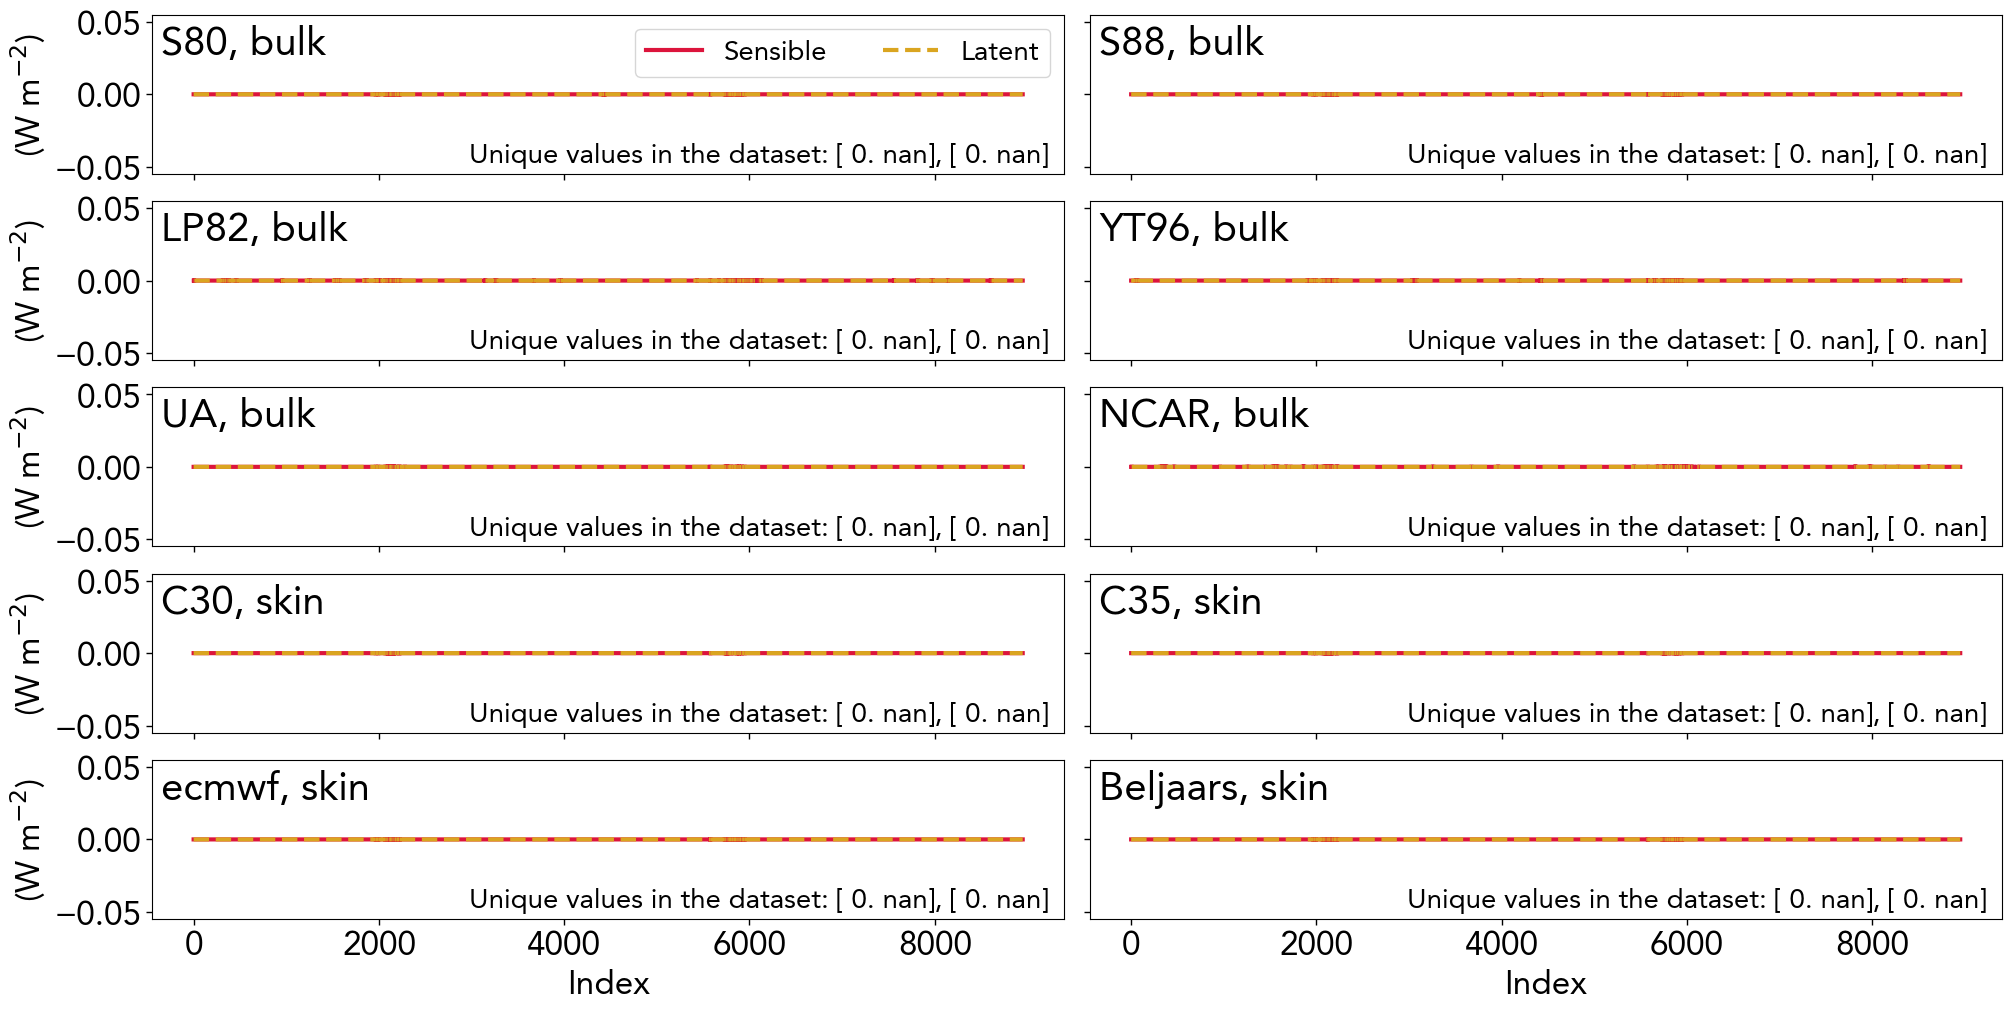

In [49]:
# Convert Sailbuoy data into NumPy arrays
lat = np.asarray(ds["latitude"])        # Latitude
spd = np.asarray(ds["wind_speed"])      # Wind speed
t = np.asarray(ds["air_t"])             # Air temperature
sst = np.asarray(ds["sst"])              # Sea surface temperature
rh = np.asarray(ds["rh"])                # Relative humidity

# Initialize a constant
hin = 1

methods = ["S80", "S88", "LP82", "YT96", "UA", "NCAR", "C30", "C35", "ecmwf", "Beljaars"]
ssts = ["bulk", "bulk", "bulk", "bulk", "bulk", "bulk", "skin", "skin", "skin", "skin"]

# Create subplots
fig, ax = plt.subplots(int(len(methods) / 2), 2, figsize=(20, 10), constrained_layout=True, sharex=True, sharey=True)

# Iterate over methods and subplots
for axs, meth, sstm in zip(ax.flatten(), methods, ssts):

    # Calculate stuff at 10 meters above the sea surface
    ten = ASFC(spd, t, sst, sstm, meth=meth, lat=lat, hin=hin, hout=10, hum=["rh", rh], out_var=['sensible', 'latent'])

    # Calculate stuff at 2 meters above the sea surface
    two = ASFC(spd, t, sst, sstm, meth=meth, lat=lat, hin=hin, hout=2, hum=["rh", rh], out_var=['sensible', 'latent'])

    # Plot the difference in sensible and latent heat flux
    (ten['sensible'] - two['sensible']).plot(ax=axs, ls='-', c='crimson', label='Sensible', lw=3)
    (ten['latent'] - two['latent']).plot(ax=axs, ls='--', c='goldenrod', label='Latent', lw=3)
    
    # Set labels and title for each subplot
    axs.set(xlabel='Index', ylabel=r"(W m$^{-2}$)")
    axs.set_title(f"{meth}, {sstm}", loc='left', x=0.01, y=0.7)
    axs.set_title(f"Unique values in the dataset: {np.unique(ten['sensible'] - two['sensible'])}, {np.unique(ten['latent'] - two['latent'])}  ", loc='right', y=0.02, fontsize='small')

# Add legend to the first subplot
ax.flatten()[0].legend(loc='upper right', ncol=2, fontsize='small')

# Show the plot
plt.show()

# Save the figure
fig.savefig("output_height_analysis.png")